In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)


x = np.random.uniform(-30, 30, 30) 
q = np.random.uniform(-30, 30, 30) 
y = 3*x+1*q 


A =np.array( [x]+[y]).T

print(f'Матрица A:\n{A}')

Матрица A:
[[ -8.27 -51.6 ]
 [  7.89  11.95]
 [ 27.81  53.8 ]
 [ -0.7  -28.85]
 [-11.97 -63.53]
 [-10.84  -9.88]
 [-13.81 -16.55]
 [  8.72  29.61]
 [-26.24 -55.93]
 [ 10.97  60.01]
 [-28.85 -86.56]
 [ -0.76  15.06]
 [-11.12 -60.11]
 [-17.23 -30.56]
 [ -6.21 -44.28]
 [ -7.57   1.84]
 [  7.99  28.8 ]
 [ -2.87 -17.56]
 [ -6.32 -48.66]
 [-17.37 -49.99]
 [ -8.35 -52.59]
 [-19.21 -48.78]
 [-19.17 -42.62]
 [ 12.76  33.75]
 [ 29.05  79.53]
 [ 15.57  71.19]
 [-15.58 -24.51]
 [ 13.83  70.08]
 [ 16.54  43.56]
 [ -2.4   18.64]]


попытка1 - найти вектор методом МНК 

In [2]:
MNK=np.vstack([A.T[0], np.ones(len(A))]).T

In [3]:
m, c = np.linalg.lstsq(MNK, A.T[1], rcond=None)[0]
m, c

(2.8116404228145124, 0.6876968626775376)

In [4]:
U, s, V = np.linalg.svd(A)

In [5]:
D = np.eye(2)*s

In [6]:
print(f'Матрица D:\n{D}')

Матрица D:
[[267.57   0.  ]
 [  0.    34.82]]


In [7]:
A_=np.array([[A.T[0].dot(A.T[0]), A.T[0].dot(A.T[1])], [A.T[1].dot(A.T[0]), A.T[1].dot(A.T[1])]])
w, v = np.linalg.eig(A_)
print(f'Матрица A_:\n{A_}')
print(f'Собственные значения:\n{w}')
print(f'Собственные векторы:\n{v}')

U, s, V = np.linalg.svd(A_)
D = np.eye(2)*s
print(f'Собственные значения:\n{s}')
print(f'Матрица U:\n{U}')
print(f'Собственные вектор, найденный по первому собственному значению:\n{U[0]}')
print(f'Собственные вектор, найденный по второму собственному значению:\n{U[1]}')
print(f'Матрица V:\n{V}')


print(f'Матрица d:\n{v[:,0]}')

Матрица A_:
[[ 6772.81 18985.14]
 [18985.14 66033.44]]
Собственные значения:
[ 1212.35 71593.9 ]
Собственные векторы:
[[-0.96 -0.28]
 [ 0.28 -0.96]]
Собственные значения:
[71593.9   1212.35]
Матрица U:
[[-0.28 -0.96]
 [-0.96  0.28]]
Собственные вектор, найденный по первому собственному значению:
[-0.28 -0.96]
Собственные вектор, найденный по второму собственному значению:
[-0.96  0.28]
Матрица V:
[[-0.28 -0.96]
 [-0.96  0.28]]
Матрица d:
[-0.96  0.28]


судя по всему не совсем удалось

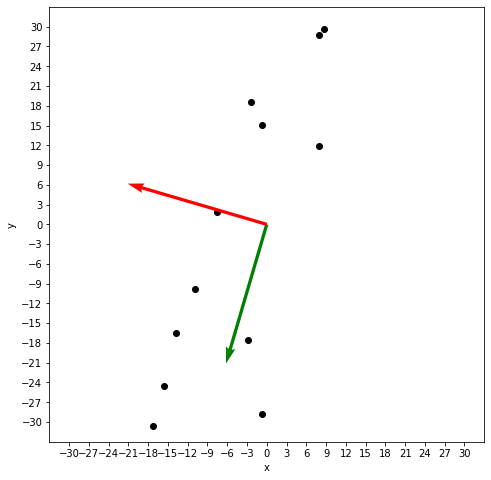

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.xlim([-33, 33])
plt.ylim([-33, 33])
plt.yticks(np.arange(-30, 31, 3))
plt.xticks(np.arange(-30, 31, 3))
plt.gca().set_aspect('equal', adjustable='box')


plt.scatter(A.T[0], A.T[1], c='black')

origin = [0], [0] # origin point
plt.quiver(*origin, U[:,0], U[:,1], color=['g','r'], scale=3)
plt.xlabel("x")
plt.ylabel("y")

plt.show()